In [48]:
import numpy as np 
import pandas as pd 
from scipy import linalg
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn


In [49]:
two_composite_filtered = pd.read_csv("../Curated_data/two_composite_filtered.csv", low_memory=False)

In [50]:
for column in two_composite_filtered:
    print(column)

Sample Number
Name
Depth From
Depth To
X
Y
Z
Length
Alt1_Code
Alt1_Int
Alt1_Style
Alt2_Code
Alt2_Int
Alt2_Style
Au_ppb
Comments
Core_Angle
Core_Diameter
CoreLoss_m
Cumulate
DataSet
Date_Logged
Density
Density_gcm3
Density_kgm3
Dest
Gamma_uRh
Gangue_Min
Interval_Length
Ir_ppb
Ja
Jn
Jr
Lith1_Code
Logged_By
Min1_Code
Min1_Pct
Min1_Style
Min2_Code
Min2_Pct
Min2_Style
Min3_Code
Min3_Pct
Min3_Style
Ore_Type
Ori_Confidence
Orig_Lith
Os_ppb
Pd_ppb
Proportion (Alt1_Code)
Proportion (Alt1_Int)
Proportion (Alt1_Style)
Proportion (Alt2_Code)
Proportion (Alt2_Int)
Proportion (Alt2_Style)
Proportion (Comments)
Proportion (DataSet)
Proportion (Date_Logged)
Proportion (Gangue_Min)
Proportion (Lith1_Code)
Proportion (Logged_By)
Proportion (Min1_Code)
Proportion (Min1_Style)
Proportion (Min2_Code)
Proportion (Min2_Style)
Proportion (Min3_Code)
Proportion (Min3_Style)
Proportion (Ore_Type)
Proportion (Ori_Confidence)
Proportion (Orig_Lith)
Proportion (samp_id)
Proportion (SampleID)
Proportion (Sulph1_Cod

# 1. Mineralogy

In [51]:
mineral_columns = two_composite_filtered.iloc[:, list(range(4, 7)) + list(range(35, 44))]
mineral_columns

,X,Y,Z,Min1_Code,Min1_Pct,Min1_Style,Min2_Code,Min2_Pct,Min2_Style,Min3_Code,Min3_Pct,Min3_Style
0,3498947.63,7511204.97,236.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3498948.84,7511204.92,234.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3498950.05,7511204.87,233.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3498951.26,7511204.82,231.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3498952.47,7511204.77,230.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
97858,3498735.00,7510855.00,116.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97859,3498735.00,7510855.00,114.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97860,3498735.00,7510855.00,112.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97861,3498735.00,7510855.00,110.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Iterate through columns in mineral_columns and display non-NaN values
for column in mineral_columns.columns:
    non_na_values = mineral_columns[column].dropna()
    if not non_na_values.empty:
        print(f"Column: {column}")
        print(non_na_values.head())
        print()


Column: X
0    3498947.63
1    3498948.84
2    3498950.05
3    3498951.26
4    3498952.47
Name: X, dtype: float64

Column: Y
0    7511204.97
1    7511204.92
2    7511204.87
3    7511204.82
4    7511204.77
Name: Y, dtype: float64

Column: Z
0    236.38
1    234.79
2    233.20
3    231.61
4    230.01
Name: Z, dtype: float64

Column: Min1_Code
771    PL
772    PL
789    PL
790    PL
791    PL
Name: Min1_Code, dtype: object

Column: Min1_Pct
2948    10.0
2949    10.0
2950    10.0
2951    10.0
2952    10.0
Name: Min1_Pct, dtype: float64

Column: Min1_Style
2227    di>ve
2228       pa
2229       pa
2230       di
2231       di
Name: Min1_Style, dtype: object

Column: Min2_Code
1955    OP
1956    OP
1957    OP
1959    OP
1960    OP
Name: Min2_Code, dtype: object

Column: Min2_Pct
2948    17.0
2949    17.0
2950    17.0
2951    17.0
2952    17.0
Name: Min2_Pct, dtype: float64

Column: Min2_Style
2227    di>ve
2228       pa
2229       pa
2233       pa
2234       pa
Name: Min2_Style, dtype: object

In [53]:

# Create a boolean mask to check if X, Y, and Z are not NA
xyz_not_na = two_composite_filtered[['X', 'Y', 'Z']].notna().all(axis=1)

# Create a boolean mask to check if at least one of the other columns is not NA
other_not_na = mineral_columns.iloc[:, 3:].notna().any(axis=1)

# Combine the two masks to filter rows where X, Y, Z are not NA and at least one other column is not NA
filtered_data = mineral_columns[xyz_not_na & other_not_na]

# Now, 'filtered_data' contains the rows where X, Y, and Z are not NA, and at least one of the other columns is not NA


In [54]:
clustered_data = pd.read_csv("../Curated_data/cluster_0_data.csv", low_memory=False)
x1 = clustered_data['X']
y1 = clustered_data['Y']

C:\Users\flea0265\AppData\Local\Temp\ipykernel_10992\1492081968.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', len(selected_variables))
C:\Users\flea0265\AppData\Local\Temp\ipykernel_10992\1492081968.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, label=variable)


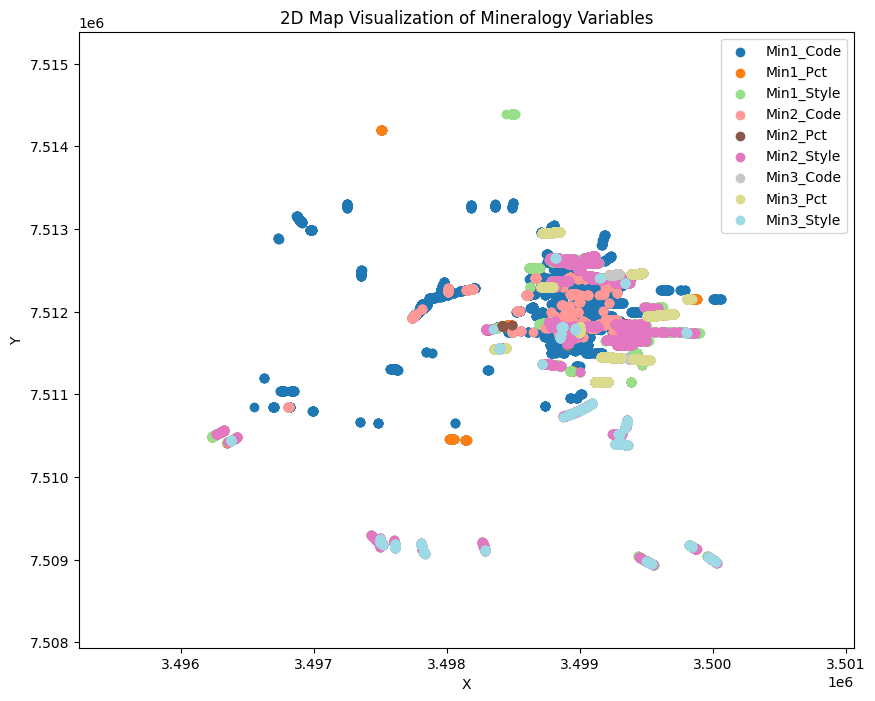

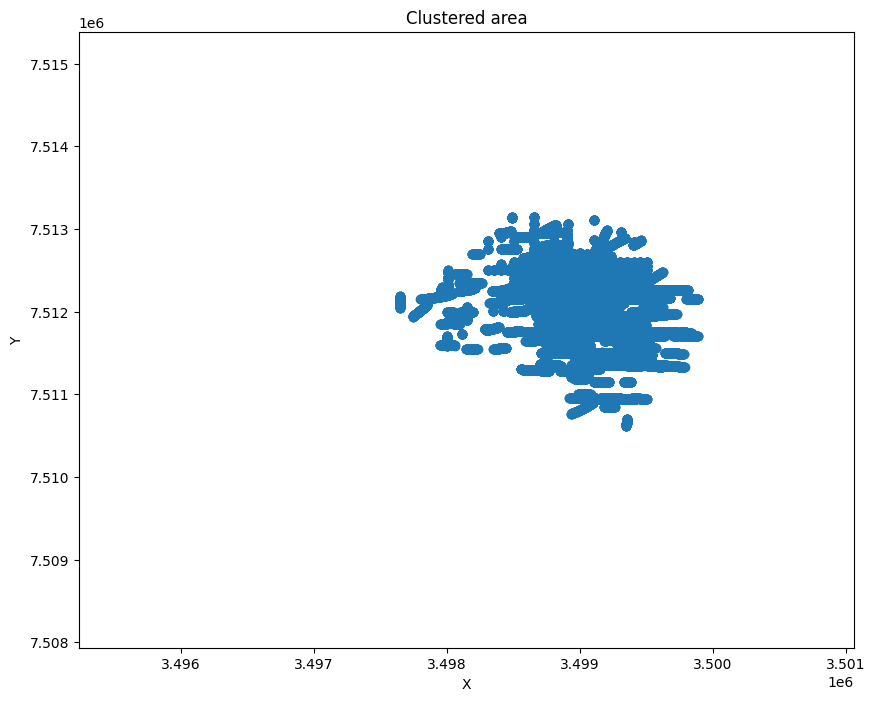

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'filtered_data' contains the filtered data where X, Y, and Z are not NA, and at least one other column is not NA
# 'mineral_columns' contains the relevant data with columns 5 to 7 and 56 to 65
# Determine the widest range among all variables

# Define the variables you want to visualize (e.g., columns 3 onwards)
selected_variables = mineral_columns.columns[3:]

# Create a color map with a unique color for each variable
cmap = plt.cm.get_cmap('tab20', len(selected_variables))

# Create a scatter plot for each variable with a unique color
plt.figure(figsize=(10, 8))

for i, variable in enumerate(selected_variables):
    non_na_mask = filtered_data[variable].notna()
    x = filtered_data['X'][non_na_mask]
    y = filtered_data['Y'][non_na_mask]
    values = filtered_data[variable][non_na_mask]
    
    # Use a unique color for each variable based on the color map
    color = cmap(i)
    
    plt.scatter(x, y, c=color, label=variable)

margin = 1000
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Map Visualization of Mineralogy Variables')
# Set the X and Y axis limits with a margin
x_min = filtered_data['X'].min() - margin
x_max = filtered_data['X'].max() + margin
y_min = filtered_data['Y'].min() - margin
y_max = filtered_data['Y'].max() + margin

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(x1, y1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustered area')
plt.show()


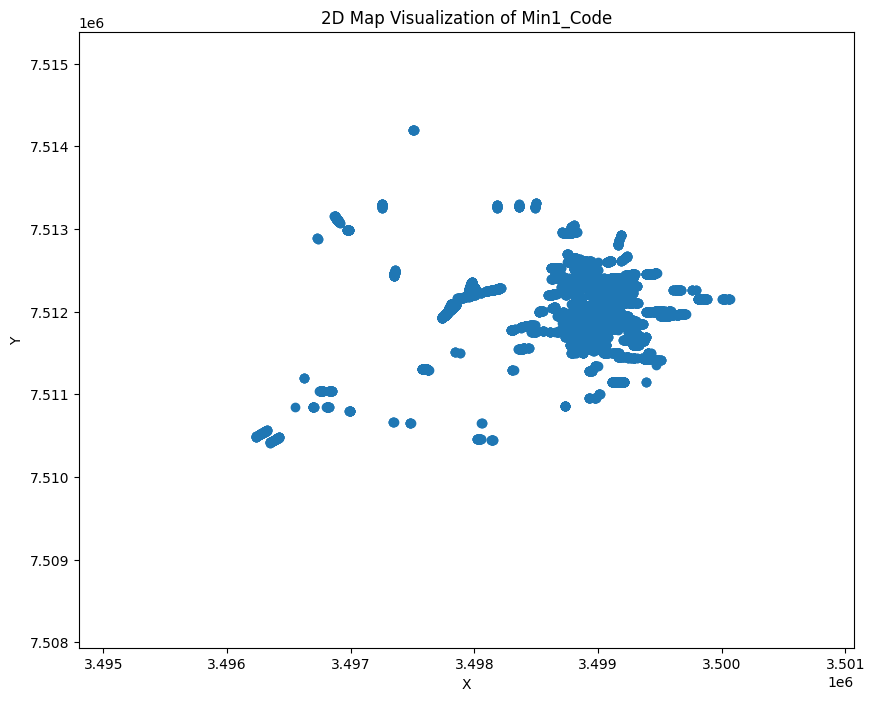

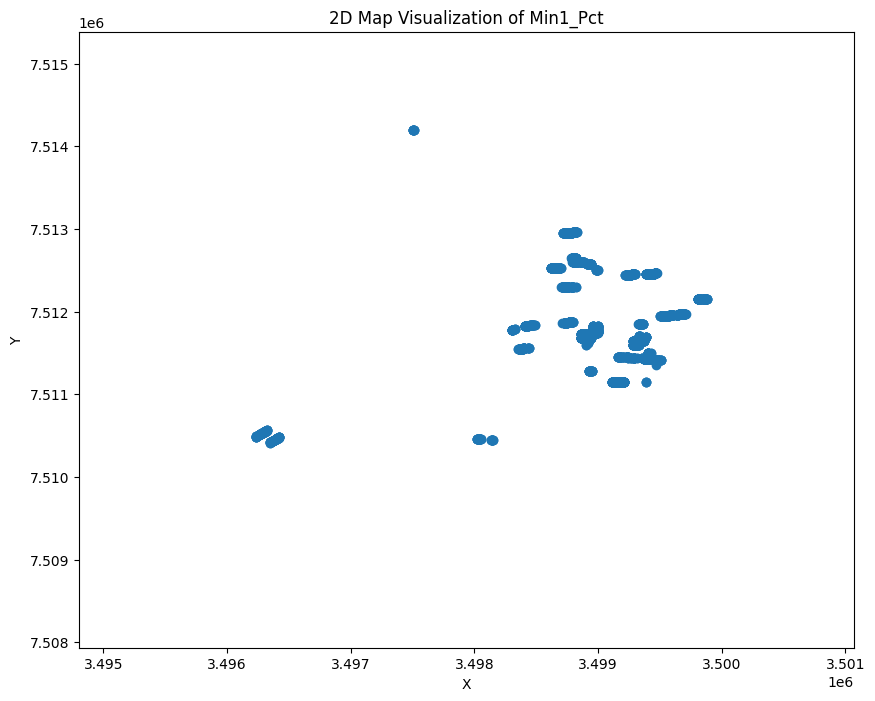

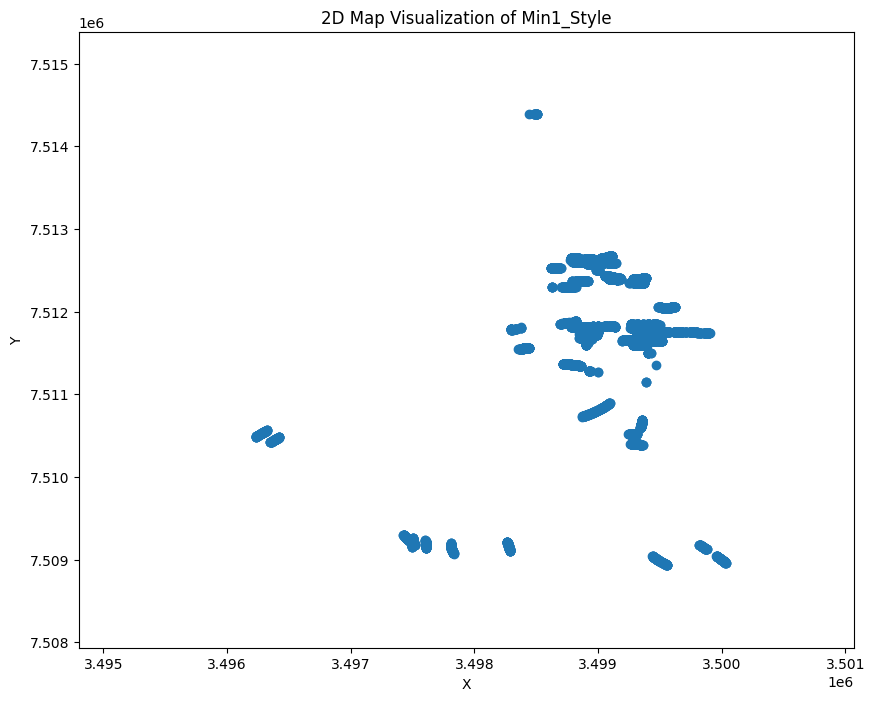

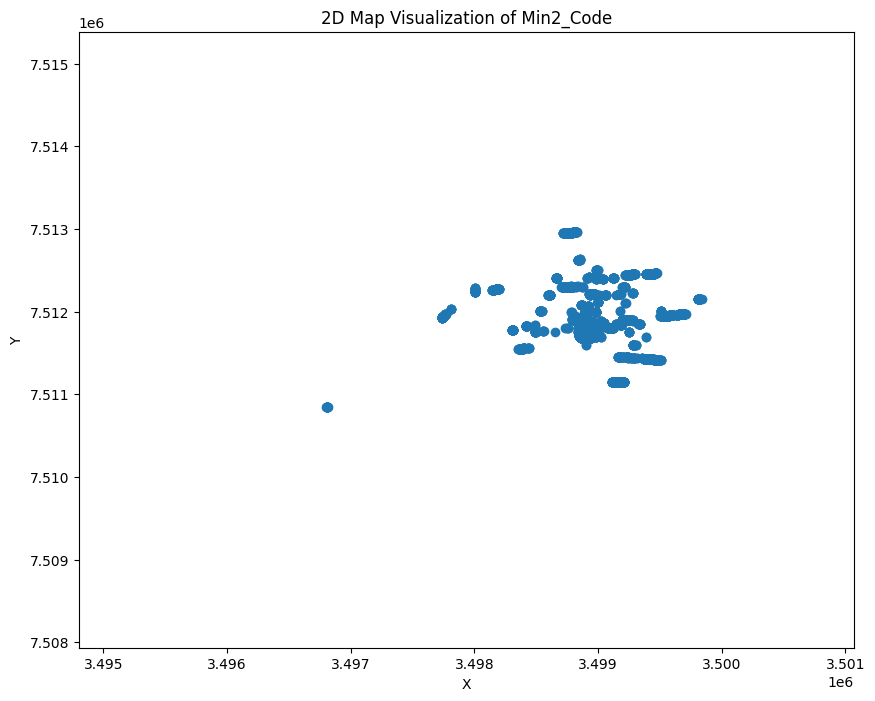

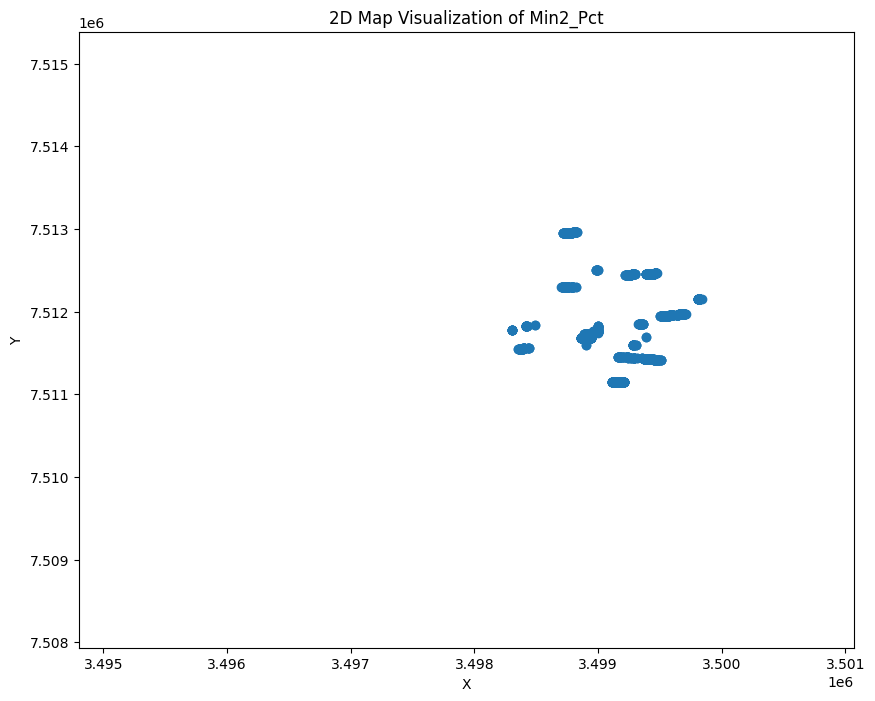

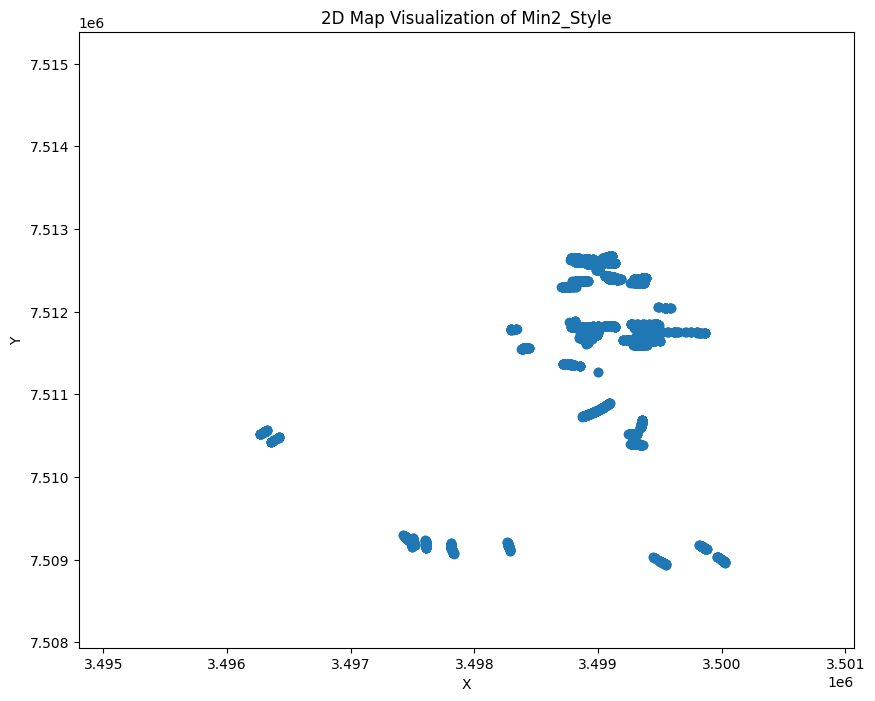

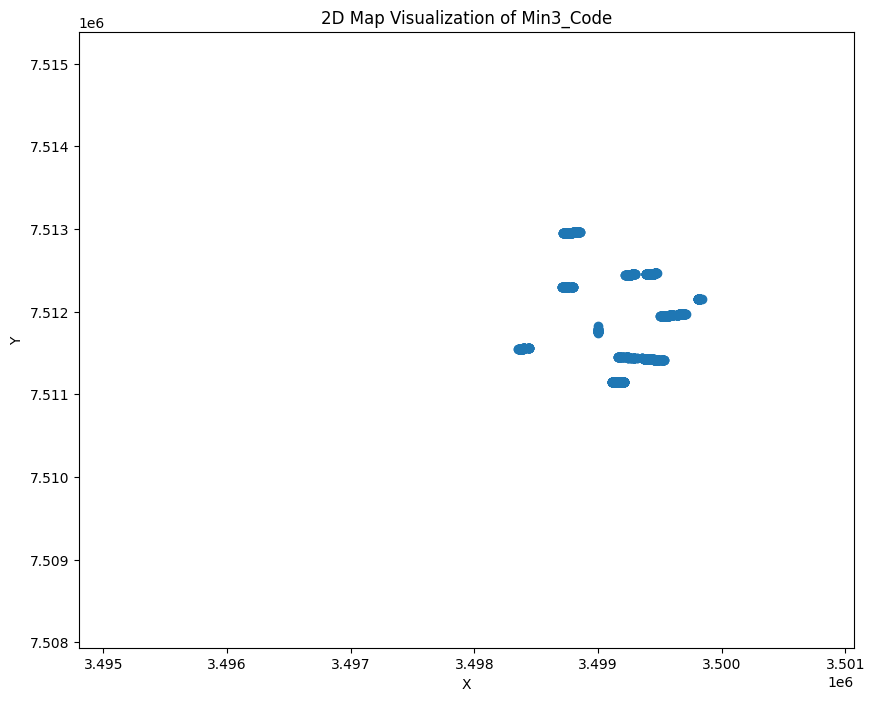

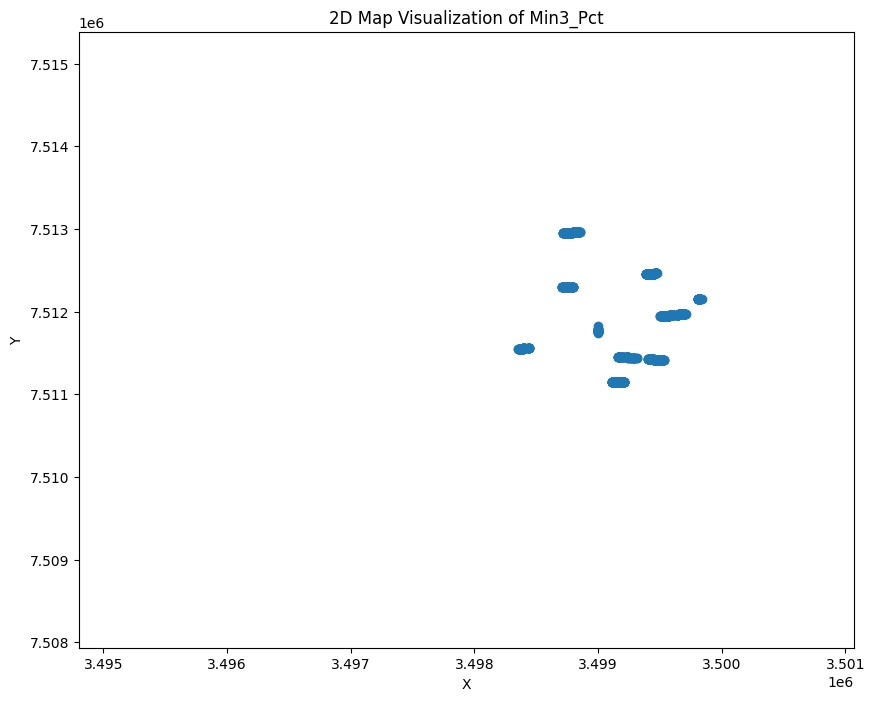

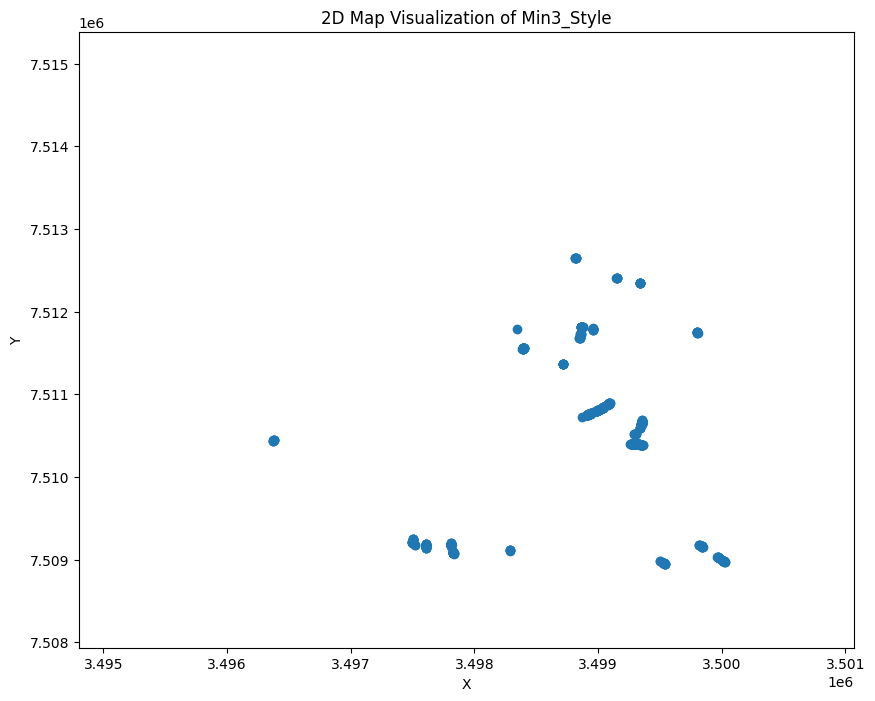

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Determine the widest range among all variables
widest_x_range = mineral_columns['X'].max() - mineral_columns['X'].min()
widest_y_range = mineral_columns['Y'].max() - mineral_columns['Y'].min()
widest_range = max(widest_x_range, widest_y_range)

# (e.g., columns 3 onwards)
selected_variables = mineral_columns.columns[3:]

# Create a separate plot for each variable with the same X and Y coordinate ranges
for variable in selected_variables:
    plt.figure(figsize=(10, 8))
    
    non_na_mask = mineral_columns[variable].notna()
    x = mineral_columns['X'][non_na_mask]
    y = mineral_columns['Y'][non_na_mask]
    values = mineral_columns[variable][non_na_mask]
    
    # Check if the variable contains non-numeric data
    if values.dtype.kind not in 'bifc':
        #print(f"Variable '{variable}' contains non-numeric data and will not have a colorbar.")
        plt.scatter(x, y)

    else:
        plt.scatter(x, y)
        #plt.scatter(x, y, c=values, cmap='viridis')
        #plt.colorbar(label=variable)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'2D Map Visualization of {variable}')
    
    margin = 1000
    # Set the same X and Y coordinate ranges for all plots
    x_min = filtered_data['X'].min() - margin
    x_max = filtered_data['X'].max() + margin
    y_min = filtered_data['Y'].min() - margin
    y_max = filtered_data['Y'].max() + margin

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.show()


# 2. Sulphides

In [57]:
sulphide_columns = two_composite_filtered.iloc[:, list(range(4, 7)) + list(range(94, 103))]
sulphide_columns

,X,Y,Z,Sulph1_Code,Sulph1_Pct,Sulph1_Style,Sulph2_Code,Sulph2_Pct,Sulph2_Style,Sulph3_Code,Sulph3_Pct,Sulph3_Style
0,3498947.63,7511204.97,236.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3498948.84,7511204.92,234.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3498950.05,7511204.87,233.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3498951.26,7511204.82,231.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3498952.47,7511204.77,230.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
97858,3498735.00,7510855.00,116.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97859,3498735.00,7510855.00,114.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97860,3498735.00,7510855.00,112.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97861,3498735.00,7510855.00,110.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
sulphide_columns_no_na = sulphide_columns.dropna()
sulphide_columns_no_na

,X,Y,Z,Sulph1_Code,Sulph1_Pct,Sulph1_Style,Sulph2_Code,Sulph2_Pct,Sulph2_Style,Sulph3_Code,Sulph3_Pct,Sulph3_Style
4440,3498872.00,7512080.89,-144.31,PO,2.00,di,CP,1.00,di,PY,1.00,di
4441,3498872.72,7512080.80,-146.18,PO,2.00,di,CP,1.00,di,PY,1.00,di
4442,3498873.44,7512080.71,-148.04,PO,2.00,di,CP,1.00,di,PY,1.00,di
4443,3498874.17,7512080.62,-149.90,PO,2.00,di,CP,1.00,di,PY,1.00,di
4444,3498874.89,7512080.53,-151.77,PO,2.00,di,CP,1.00,di,PY,1.00,di
...,...,...,...,...,...,...,...,...,...,...,...,...
96258,3499540.67,7508948.15,-16.89,PO,0.20,di,CP,0.16,di,PY,0.16,di
96259,3499541.56,7508947.47,-18.54,PO,0.16,di,CP,0.10,di,PY,0.10,di
96288,3497519.75,7509180.16,215.93,CP,0.30,pa,PO,0.20,pa,MT,2.00,ve
96289,3497518.80,7509181.10,214.44,CP,0.40,pa,PO,0.26,pa,MT,2.00,ve


In [59]:
# Assuming 'mineral_columns' contains the relevant data with columns 5 to 7 and 56 to 65

# Create a boolean mask to check if X, Y, and Z are not NA
xyz_not_na = two_composite_filtered[['X', 'Y', 'Z']].notna().all(axis=1)

# Create a boolean mask to check if at least one of the other columns is not NA
other_not_na = sulphide_columns.iloc[:, 3:].notna().any(axis=1)

# Combine the two masks to filter rows where X, Y, Z are not NA and at least one other column is not NA
filtered_data = sulphide_columns[xyz_not_na & other_not_na]

# Now, 'filtered_data' contains the rows where X, Y, and Z are not NA, and at least one of the other columns is not NA


C:\Users\flea0265\AppData\Local\Temp\ipykernel_10992\395972361.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', len(selected_variables))
C:\Users\flea0265\AppData\Local\Temp\ipykernel_10992\395972361.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, label=variable)


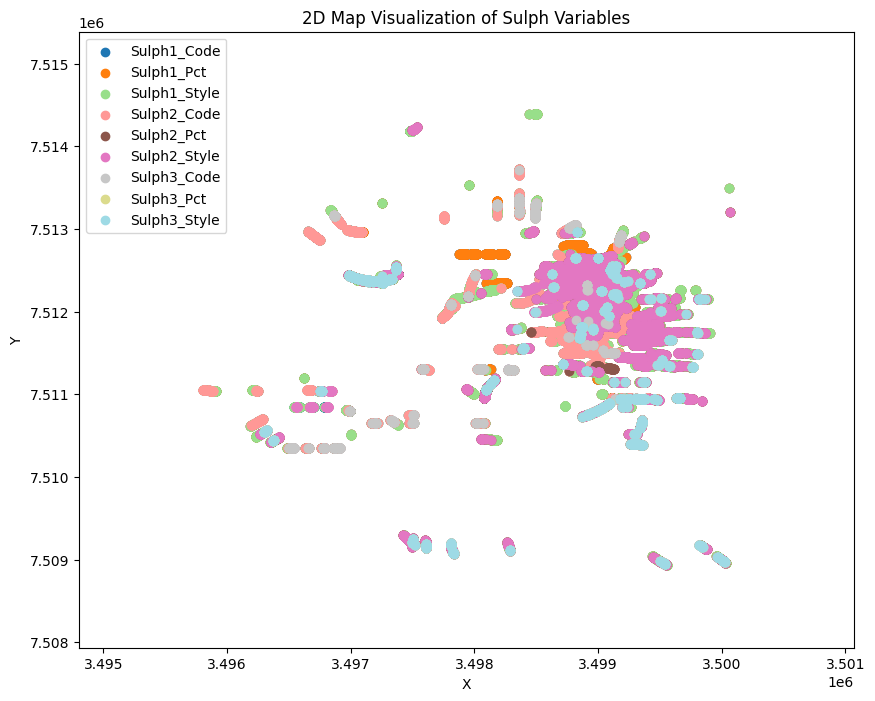

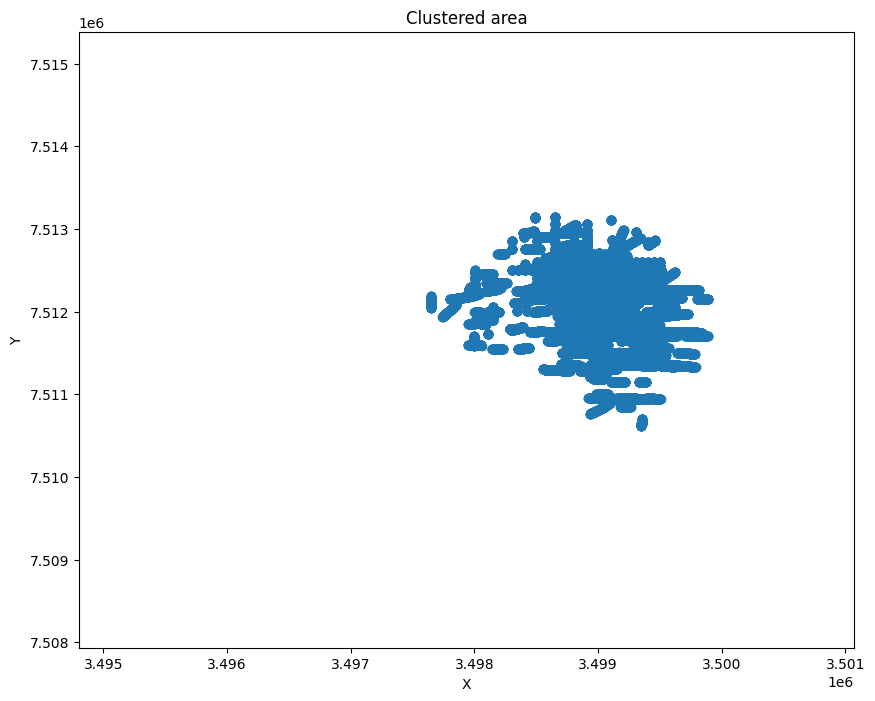

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'filtered_data' contains the filtered data where X, Y, and Z are not NA, and at least one other column is not NA
# 'sulphide_columns' contains the relevant data with columns 5 to 7 and 56 to 65
# Determine the widest range among all variables

# Define the variables you want to visualize (e.g., columns 3 onwards)
selected_variables = sulphide_columns.columns[3:]

# Create a color map with a unique color for each variable
cmap = plt.cm.get_cmap('tab20', len(selected_variables))

# Create a scatter plot for each variable with a unique color
plt.figure(figsize=(10, 8))

for i, variable in enumerate(selected_variables):
    non_na_mask = filtered_data[variable].notna()
    x = filtered_data['X'][non_na_mask]
    y = filtered_data['Y'][non_na_mask]
    values = filtered_data[variable][non_na_mask]
    
    # Use a unique color for each variable based on the color map
    color = cmap(i)
    
    plt.scatter(x, y, c=color, label=variable)

margin = 1000
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Map Visualization of Sulph Variables')
# Set the X and Y axis limits with a margin
x_min = filtered_data['X'].min() - margin
x_max = filtered_data['X'].max() + margin
y_min = filtered_data['Y'].min() - margin
y_max = filtered_data['Y'].max() + margin

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(x1, y1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustered area')
plt.show()


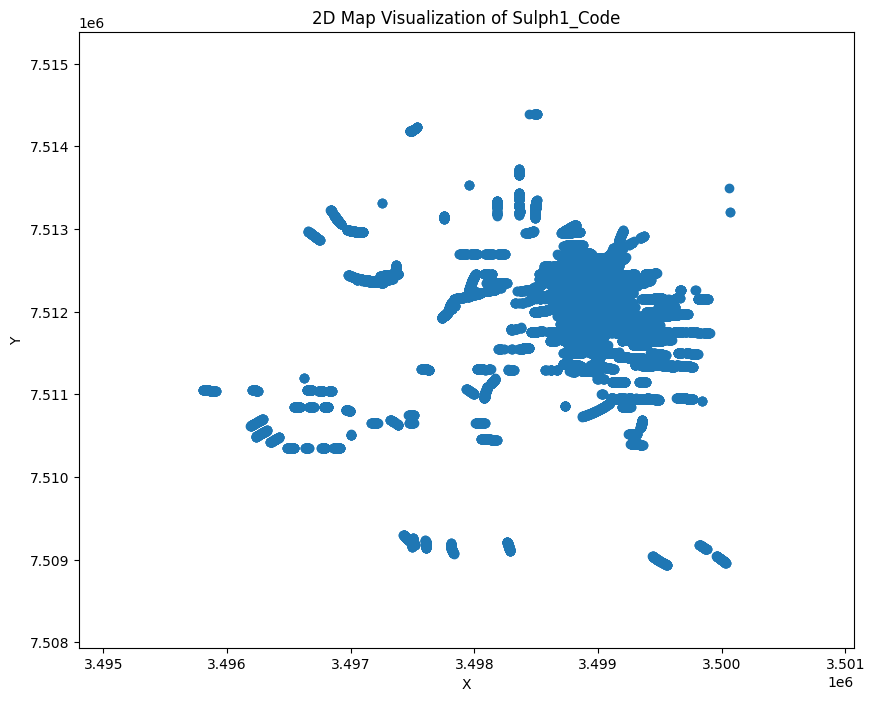

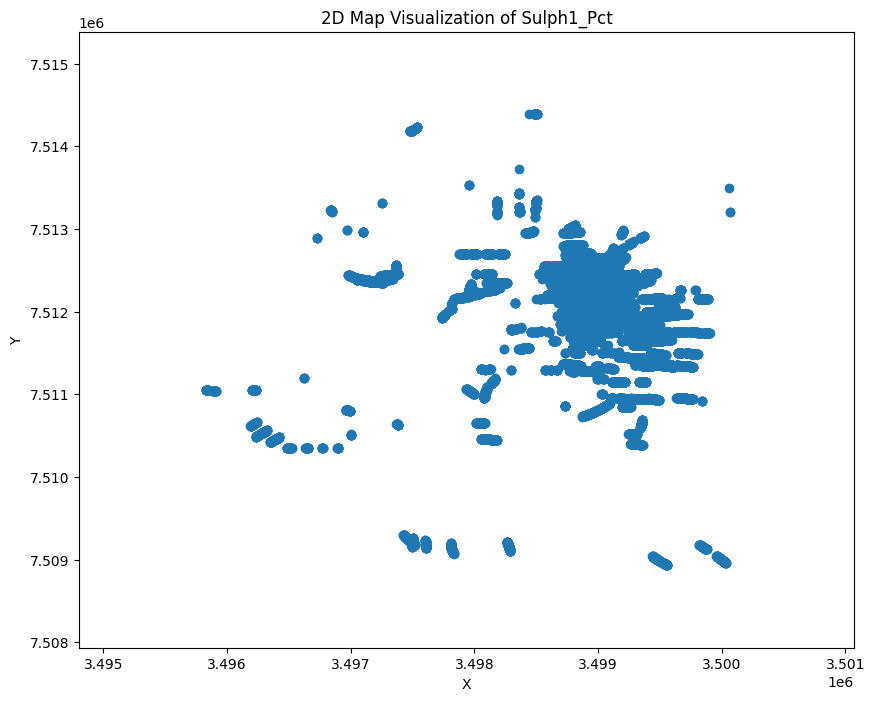

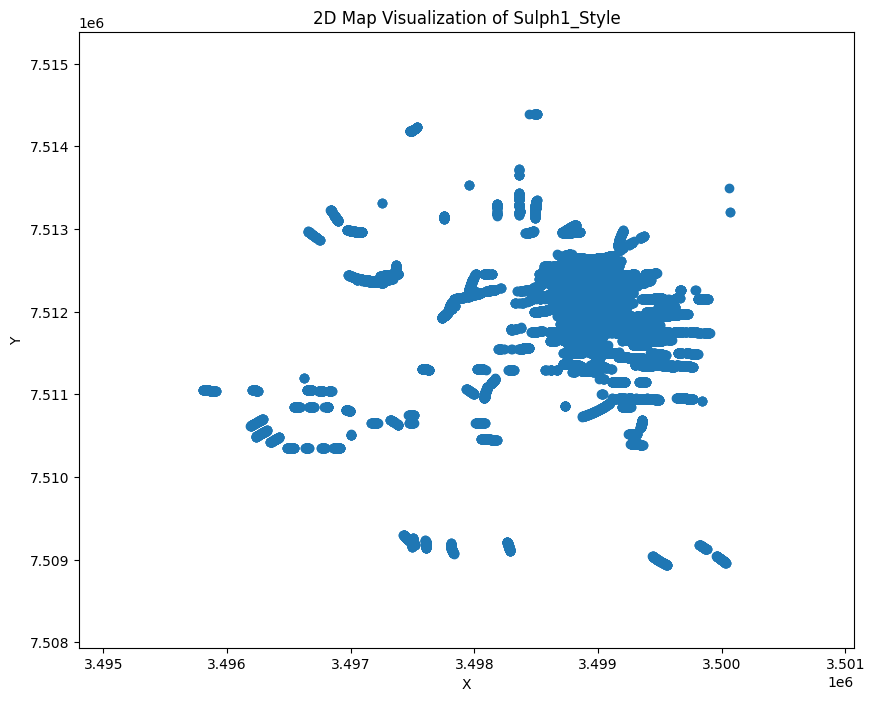

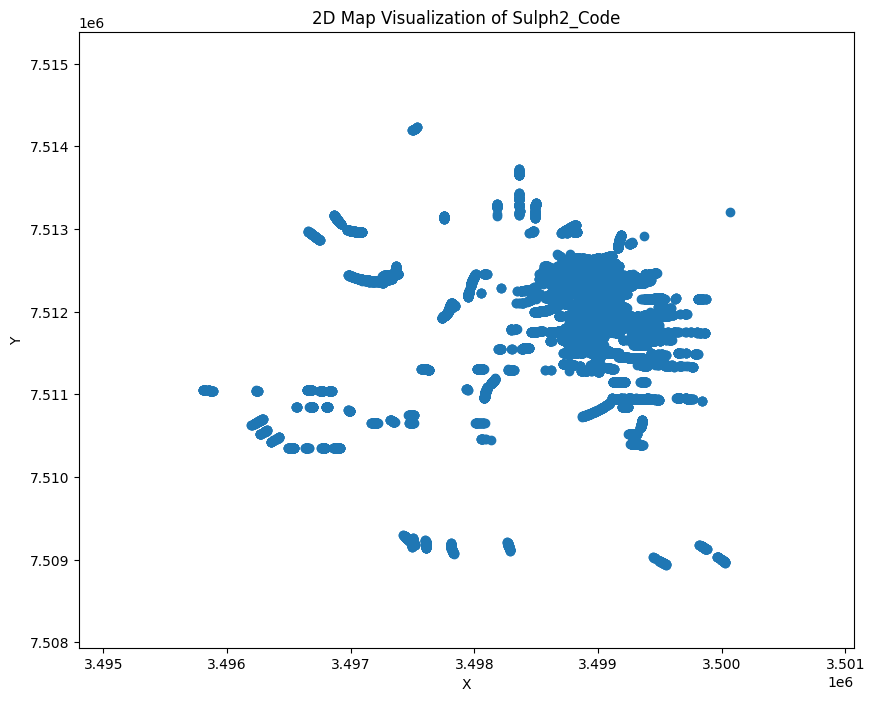

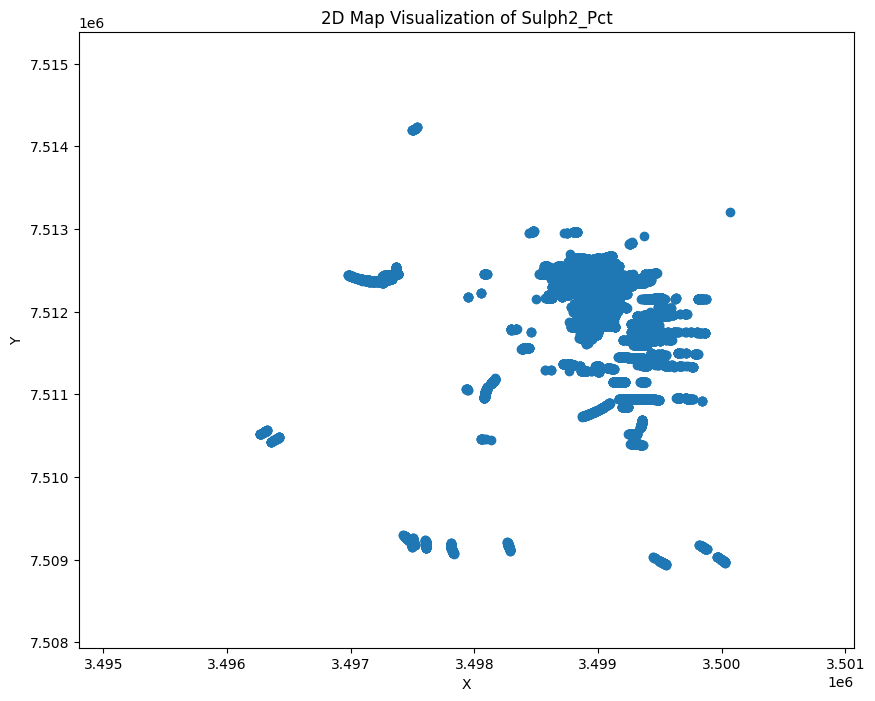

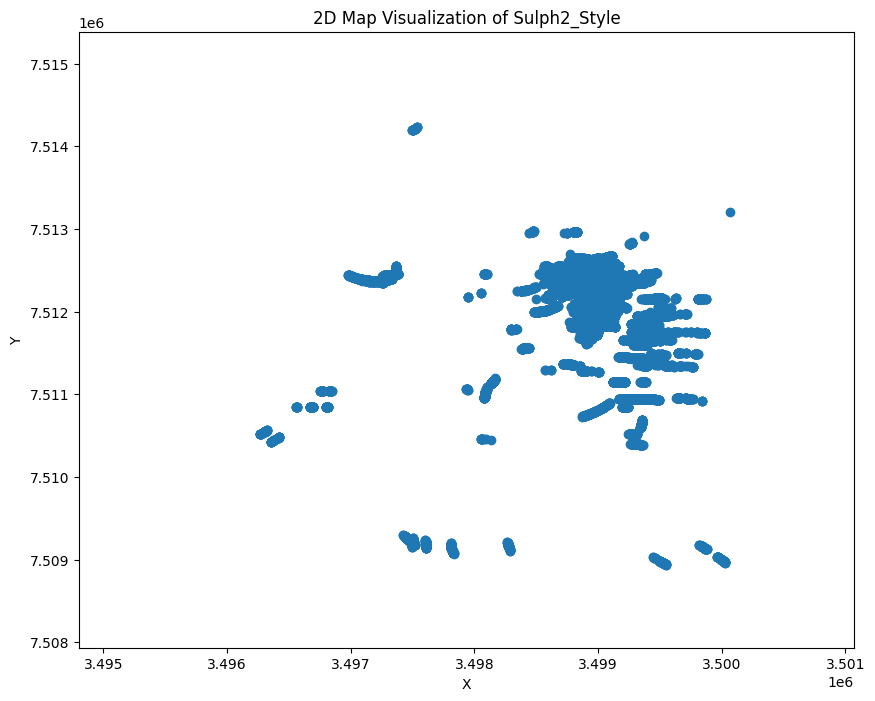

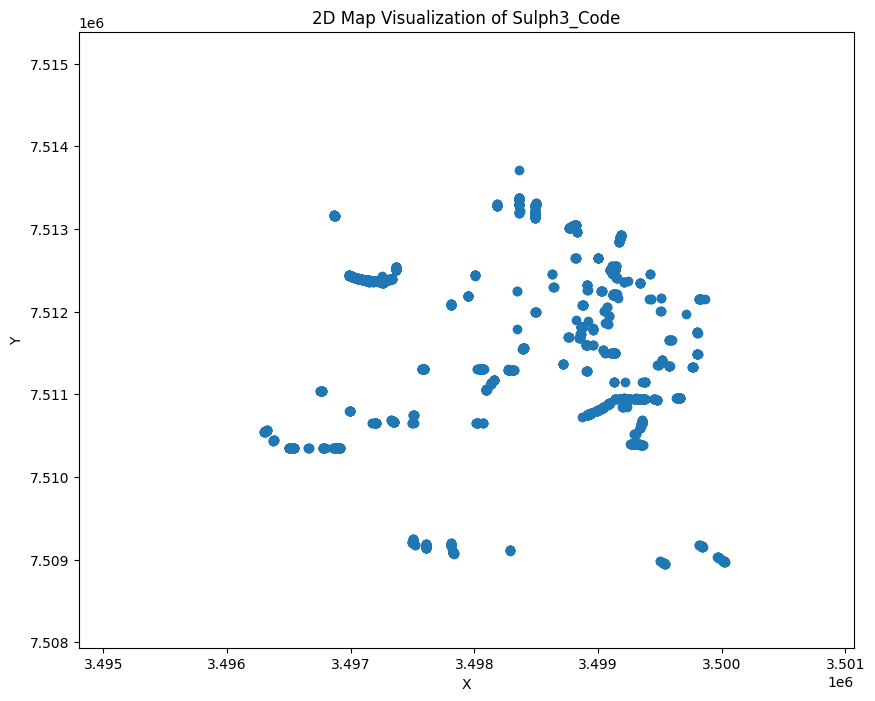

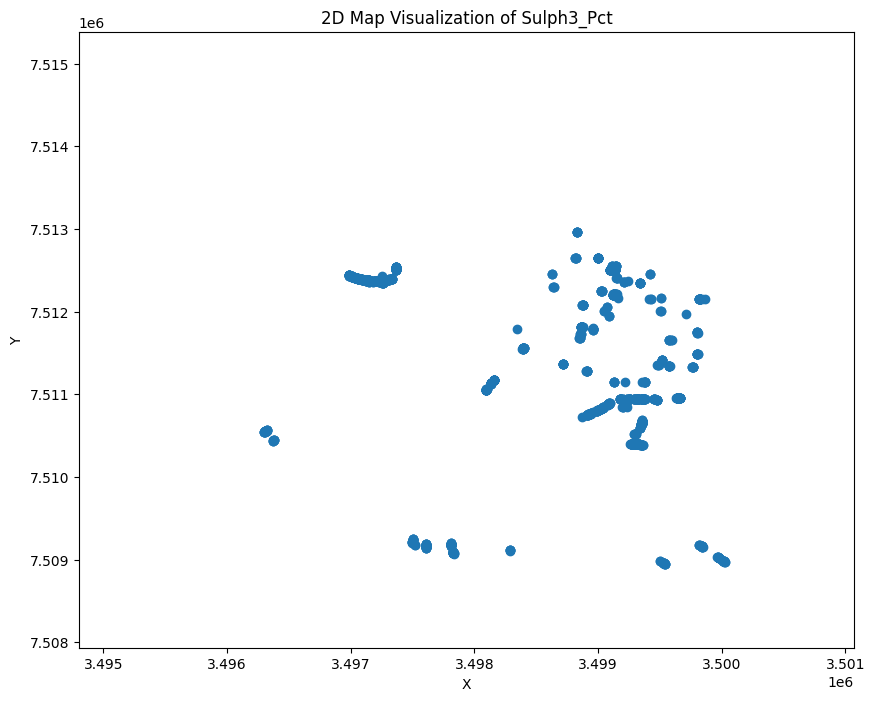

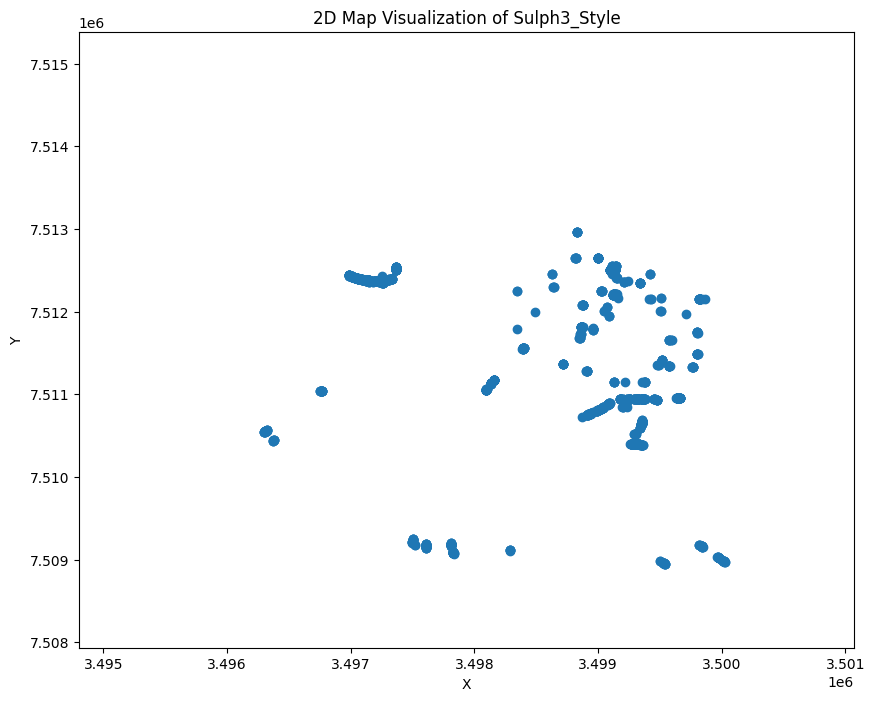

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Determine the widest range among all variables
widest_x_range = sulphide_columns['X'].max() - sulphide_columns['X'].min()
widest_y_range = sulphide_columns['Y'].max() - sulphide_columns['Y'].min()
widest_range = max(widest_x_range, widest_y_range)

# (e.g., columns 3 onwards)
selected_variables = sulphide_columns.columns[3:]

# Create a separate plot for each variable with the same X and Y coordinate ranges
for variable in selected_variables:
    plt.figure(figsize=(10, 8))
    
    non_na_mask = sulphide_columns[variable].notna()
    x = sulphide_columns['X'][non_na_mask]
    y = sulphide_columns['Y'][non_na_mask]
    values = sulphide_columns[variable][non_na_mask]
    
    # Check if the variable contains non-numeric data
    if values.dtype.kind not in 'bifc':
        #print(f"Variable '{variable}' contains non-numeric data and will not have a colorbar.")
        plt.scatter(x, y)

    else:
        plt.scatter(x, y)
        #plt.scatter(x, y, c=values, cmap='viridis')
        #plt.colorbar(label=variable)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'2D Map Visualization of {variable}')
    
    # Set the same X and Y coordinate ranges for all plots
    margin = 1000
    x_min = filtered_data['X'].min() - margin
    x_max = filtered_data['X'].max() + margin
    y_min = filtered_data['Y'].min() - margin
    y_max = filtered_data['Y'].max() + margin

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()
